# Cardiovascular Disease Dataset
Source: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset/data

In [1]:
# Import packages
from Bias import BIASme
from Transformations import remove_outliers_lof, trafo_keep_axes
from DensityEstimators import DE_histogram, DE_kde
from IMITATE import IMITATE
from sklearn import model_selection
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def loadData_cardio(dataset_size=3497):
    dataset = pd.read_csv('Datasets/cardio_train.csv', header=0, sep=';', index_col=0)
    y = dataset['cardio'].to_numpy()
    dataset = dataset[['age', 'weight']]
    dataset = dataset.assign(age = dataset.age/365.25)
    
    isInB = np.array([1] * len(dataset))
    isInB = isInB.reshape(len(isInB), 1)
    
    X = np.append(dataset.to_numpy(), isInB, axis=1)
    
    # draw sample
    X, _, y, _ = model_selection.train_test_split(X, y, test_size=0.90)
    
    return X, y

In [3]:
def bias_cardio(data, labels):
    isInB = data[:,-1]
    X = data[isInB==1]
    X = X[:, 0:(len(data[0])-1)]
    y = labels[isInB==1]
    return X, y

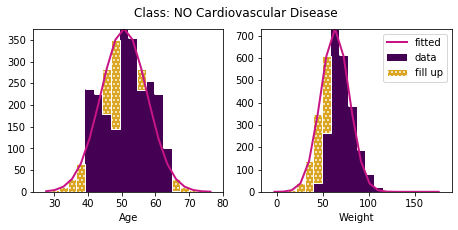

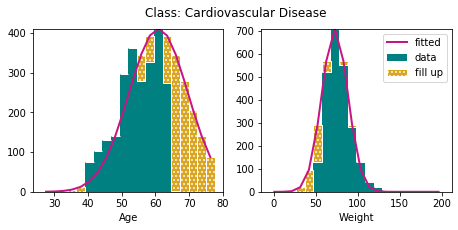

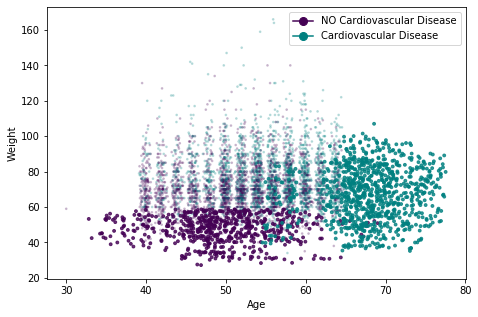

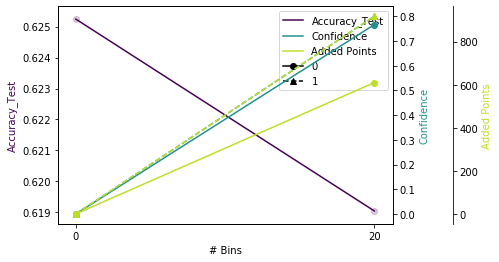

In [4]:
data_gen = loadData_cardio
bias_gen = bias_cardio
DE = DE_histogram
bh = IMITATE([20], bias_gen, data_gen, repeat=1, DE=DE, trafo=trafo_keep_axes)
bh.run(fill_up_plots=True, point_plots=False, result_plot=True)